##  Intro to tonal representation of data, and RTcmix 
### (1) Read in the data file ! 
### (2) No Rhythm ! time determines pitches
### (3) Got Rhythm! pitches determine time
### (4) Swelling chords

In [3]:
# import what you need ! 

import sys
sys.path.append('../2_modules/')

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import subprocess as sp
from subprocess import Popen

# our modules: 
import notepicker
#import makeDataChord_v2 as mDc
import writeCmixSco_GRAN_v2 as wRT_gran
import writeCmixSco_WT_ac as wRT_wt
# _ac stands for autocheck

%matplotlib inline

# ======================================================
# autocheck for your RTcmix installation type: 
cmixStatus, cmixResult = sp.getstatusoutput("CMIX")
if cmixStatus == 0:
    cmixInstalled = True
    print("CMIX found.")
else:
    cmixInstalled = False
    print("CMIX not found, using pyGoRTcmix instead.")
# ======================================================

%matplotlib inline

CMIX not found, using pyGoRTcmix instead.


## (1) Read in the data ! 

In [4]:
# READ IN THE DATA FILE ! ! !
datafilename = '../0_data_examples/breathalyzer/120s_wurfigurinitout.pkl'

breath = pd.read_pickle(datafilename) # np.loadtxt(datafilename)
print(breath[0:5])
time = breath.time_s
p1 = temp_C = breath.temp_C
p2 = humidity = breath.hum

# put the data into a dictionary: 
# (very useful, but we will also work with pandas)
data_dict = {}
data_dict['time_o'] = time  # the _o indicates these are the original values, un-re-sampled
data_dict['p1_o'] = p1

      hum  temp_C  time_s
0  18.882   26.95  0.0000
1  18.883   26.96  0.3755
2  18.884   26.97  0.7509
3  18.884   26.97  1.1264
4  18.884   26.97  1.5021


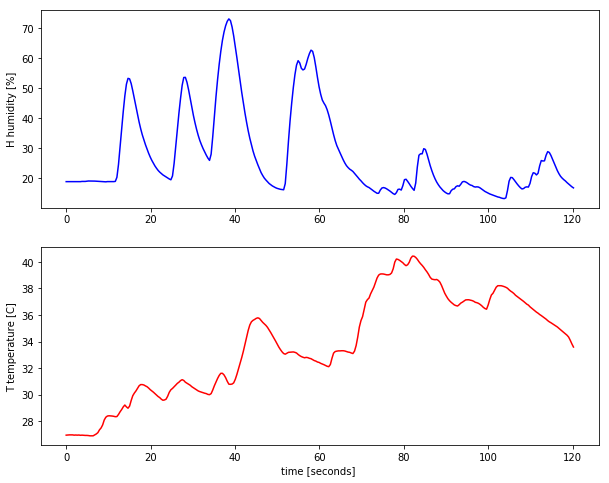

In [5]:
# PLOT THE DATA AS CURVES... 
fig = plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(time,humidity,'b-')
#plt.xlabel('time')
plt.ylabel('H humidity [%]') #Rhythm 

plt.subplot(2,1,2)
plt.plot(time,temp_C,'r-')
plt.xlabel('time [seconds] ')
plt.ylabel('T temperature [C]') #swelling cords

plt.show()

## (2) No Rhythm ! time determines pitches

(1) Decide the times at which you want to sample the data <br>
(2) Interpolate the y-values to a range of frequency <br>
(3) Interpolate the frequency values at each time <br>
(4) write RTcmix Wavetable score <br>

In [6]:
# (1) Decide the times at which you want to sample the data
ind_end = len(time)-1
duration_data = time[ind_end]
print('data duration = ', str(duration_data))
t_start = 0
t_end = time[ind_end] 
n_notes = 100
times = np.linspace(t_start,t_end,n_notes)

# stretch or shrink time, for the duration of the score-- 
# but you'll see why we need to keep the original times... 

stretch = 0.2
times_sco = times*stretch
print('score duration = ', str(times_sco[-1]))
dt = times_sco[2]-times_sco[1]
print(dt)

data duration =  120.2081
score duration =  24.04162
0.24284464646464646


In [7]:
# (2) Interpolate the y-values to a range of frequency 
# NOTE: we will use interpolate all the time ! play with it to understand what it is doing! 
p1_data_range = np.linspace(min(p1),max(p1),40) # the number of points doesnt matter here ! 
f_min = 220.
f_max = 800.
freq_range = np.linspace(f_min,f_max,40)

# np.interp(x, xp, yp) : 
# x is the array of discrete sampling values, xp is original x, yp is original y
# returns the y values at 

p1_f = np.interp(p1,p1_data_range,freq_range)
print(p1[0:10])
print(p1_f[0:10])


0    26.95
1    26.96
2    26.97
3    26.97
4    26.97
5    26.95
6    26.96
7    26.95
8    26.96
9    26.94
Name: temp_C, dtype: float64
[222.14180207 222.57016248 222.9985229  222.9985229  222.9985229
 222.14180207 222.57016248 222.14180207 222.57016248 221.71344165]


In [9]:
# (3) Interpolate the frequency values at each time
pitches = np.interp(times,time,p1_f)
print(pitches[0:10])

print('TIMES',times[0:10])
print('TIME', time[0:10])
print('FREQ_RANGE', p1_f[0:10])

[222.14180207 222.9985229  222.37024598 222.01304276 221.28508124
 220.         227.68743077 251.47557667 283.30282889 283.74080734]
TIMES [ 0.          1.21422323  2.42844646  3.6426697   4.85689293  6.07111616
  7.28533939  8.49956263  9.71378586 10.92800909]
TIME 0    0.0000
1    0.3755
2    0.7509
3    1.1264
4    1.5021
5    1.8777
6    2.2532
7    2.6287
8    3.0042
9    3.3799
Name: time_s, dtype: float64
FREQ_RANGE [222.14180207 222.57016248 222.9985229  222.9985229  222.9985229
 222.14180207 222.57016248 222.14180207 222.57016248 221.71344165]


Text(0, 0.5, 'pitches (T temperature)')

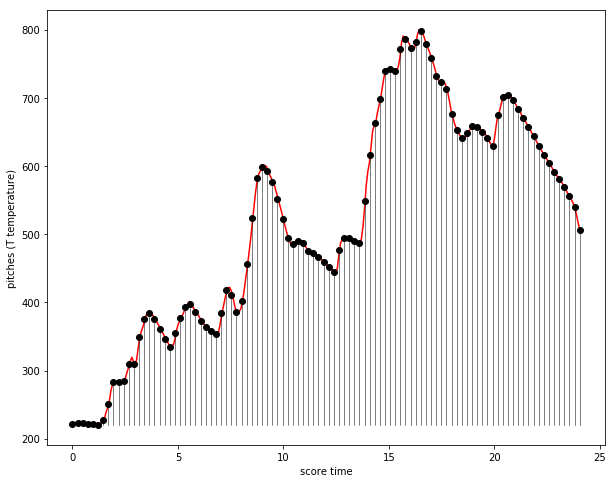

In [7]:
# plot the results: 

fig = plt.[figure(figsize=(10,8))
time_tmp = np.linspace(times_sco[0],times_sco[-1],len(p1_f))
plt.plot(time_tmp,p1_f,'r-')
plt.plot(times_sco,pitches,'ko')
for ind,t in enumerate(times_sco):
    plt.plot([t,t],[f_min,pitches[ind]],'k-', linewidth=0.5)
    
plt.xlabel('score time')
plt.ylabel('pitches (T temperature)')

In [8]:
# (4) write RTcmix Wavetable score
reload(wRT_wt)
base_name = 'test_noRhythm1'

tones_dict = {}
tones_dict['times'] = np.asarray(times_sco)
tones_dict['notes'] = np.asarray(pitches)
tones_dict['durs'] = np.ones(len(pitches))*dt*1.0 # the 0.8 makes for more discrete pitches
tones_dict['amps'] = np.ones(len(pitches))*2000
tones_dict['pans'] = np.ones(len(pitches))*0.5

score_name = wRT_wt.writesco(tones_dict,base_name)

test_noRhythm1.sco
CMIX not found; rtoutput() will not be used in score.


In [9]:
cmix_cmd = 'CMIX < ' + score_name
print(cmix_cmd)

# the ! tells the notebook to run a command in the terminal
! pwd
! ls *.sco
# or if that doesnt work, try this: 
ls_output = sp.check_output(['pwd'])
print(ls_output)
# but THIS works better ! 
! pwd

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True
runCMIX.wait()
print("hopefully i just wrote your sound file; is it here?")
! ls *.wav

sp.run(['mv', score_name, '../3_output_nogit'])
sp.run('mv *.wav ../3_output_nogit/', shell=True)

CMIX < test_noRhythm1.sco
/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes
Temp_gransynth_LeftCh.sco humidity_dataChords.sco   test_noRhythm1.sco
b'/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes\n'
/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes
hopefully i just wrote your sound file; is it here?
humidity_dataChords.wav


CompletedProcess(args='mv *.wav ../3_output_nogit/', returncode=0)

## 3) Got Rhythm ! pitches determine time !  

(1) Define the frequencies that we want to use ! <br>
(2) Interpolate the y values to this range of frequencies. <br>
(3) Find where in time these values occur, use these as our start times and durations.  <br>
(4) Generate the score. <br>

In [21]:
n_octaves_total = 2.0
root_note  = 110.0
ints_per_oct = 12

# chromatic scale of n octaves: 
intervals = np.linspace(0,n_octaves_total,int(n_octaves_total*ints_per_oct))
pitches = root_note*(2**intervals)
print(pitches)

# or... major scales of n octaves, etc... 



[110.         116.83398945 124.09255538 131.80207552 139.99056637
 148.68778505 157.92533737 167.73679273 178.15780612 189.22624765
 200.98234021 213.4688056  226.73101985 240.81717802 255.77846943
 271.66926363 288.54730802 306.47393766 325.51429819 345.73758257
 367.21728251 390.03145556 414.26300879 440.        ]


Text(0, 0.5, 'pitches (T temperature)')

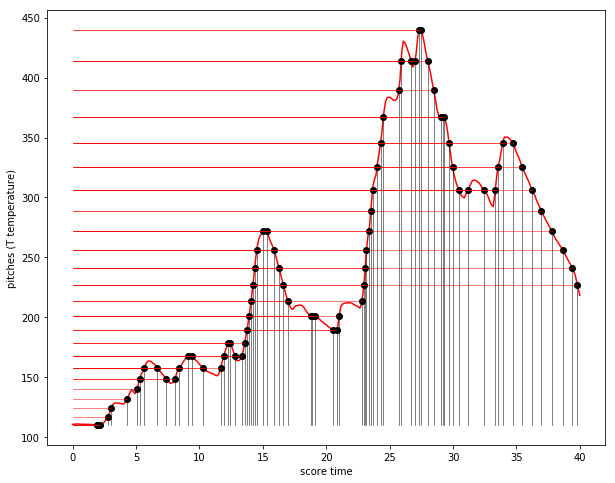

In [22]:
# (2) Interpolate the y-values to a range of frequency (using notepicker !)
reload(notepicker)
p1_in_freq = notepicker.interpvals_to_freqs(p1,pitches)

# (3) Find where in time these values occur, use these as our start times and durations.
dur_sound = 40.0
time = np.linspace(0,dur_sound,len(p1_in_freq))
scale_note_dur = 0.8
times, notes, durs = notepicker.findroots(time,p1_in_freq,pitches)


# plot the results: 
fig = plt.figure(figsize=(10,8))

time_tmp = np.linspace(time[0],time[-1],len(p1_in_freq))
plt.plot(time_tmp,p1_in_freq,'r-')
plt.plot(times,notes,'ko')

for ind,t in enumerate(times):
    plt.plot([t,t],[min(notes),notes[ind]],'k-',linewidth=0.5)
    plt.plot([0,t],[notes[ind],notes[ind]],'r-',linewidth=0.5)
    
plt.xlabel('score time')
plt.ylabel('pitches (T temperature)')

In [23]:
# (4) write RTcmix Wavetable score
reload(wRT_wt)
base_name = 'test_gotRhythm1'
trim = -1
tones_dict = {}
tones_dict['times'] = np.asarray(times[:trim])
tones_dict['notes'] = np.asarray(notes[:trim])
tones_dict['durs'] = np.asarray(durs[:trim]) 
tones_dict['amps'] = np.ones(len(notes[:trim]))*2000
tones_dict['pans'] = np.ones(len(notes[:trim]))*0.5

score_name = wRT_wt.writesco(tones_dict,base_name)

test_gotRhythm1.sco
CMIX not found; rtoutput() will not be used in score.


In [24]:
cmix_cmd = 'CMIX < ' + score_name
print(cmix_cmd)

# the ! tells the notebook to run a command in the terminal
! pwd
! ls *.sco
# or if that doesnt work, try this: 
ls_output = sp.check_output(['pwd'])
print(ls_output)
# but THIS works better ! 
! pwd

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True
runCMIX.wait()
print("hopefully i just wrote your sound file; is it here?")
! ls *.wav

sp.run(['mv', score_name, '../3_output_nogit'])
sp.run('mv *.wav ../3_output_nogit/', shell=True)

CMIX < test_gotRhythm1.sco
/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes
phrygian_c.sco      scale2_RT.sco       test_gotRhythm1.sco
b'/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes\n'
/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes
hopefully i just wrote your sound file; is it here?
ls: *.wav: No such file or directory


CompletedProcess(args='mv *.wav ../3_output_nogit/', returncode=1)

### (4) Swelling chords

In [10]:
# OR USE OTHER MUSICAL STRUCTURES ! 
modes = {
    'ionian':[2,2,1,2,2,2,1],
    'dorian':[2,1,2,2,2,1,2],
    'phrygian':[1,2,2,2,1,2,2],
    'lydian':[2,2,2,1,2,2,1],
    'mixolydian':[2,2,1,2,2,1,2],
    'aeolian':[2,1,2,2,1,2,2],
    'lochrian':[1,2,2,1,2,2,2]
}

intervals = [0] + modes['phrygian'] + modes['phrygian'] + modes['phrygian'] + modes['phrygian'] # + modes['mixolydian']
print(intervals)
elements = np.cumsum(intervals[:-1])
print(elements)
#indexes = np.array(x)

C4 = 440.0 * 2**(3/12-1)
print(C4)

def notename2freq(k,v,f0):
    #freqs = f0*2**(v+k/12)
    freqs = f0*2**(v+k/12)
    return freqs

pitches = notename2freq(elements,-1,C4)
print(pitches)

[0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2]
[ 0  1  3  5  7  8 10 12 13 15 17 19 20 22 24 25 27 29 31 32 34 36 37 39
 41 43 44 46]
261.6255653005986
[ 130.81278265  138.59131549  155.56349186  174.61411572  195.99771799
  207.65234879  233.08188076  261.6255653   277.18263098  311.12698372
  349.22823143  391.99543598  415.30469758  466.16376152  523.2511306
  554.36526195  622.25396744  698.45646287  783.99087196  830.60939516
  932.32752304 1046.5022612  1108.73052391 1244.50793489 1396.91292573
 1567.98174393 1661.21879032 1864.65504607]


In [11]:
reload(notepicker)
dur = 19.0
scale_note_dur = 1.0

p1_freq = notepicker.interpvals_to_freqs(p1,pitches)

times, notes, durs = notepicker.findroots(time,p1_freq,pitches)


print(time[-1])

print(len(pitches))
print(len(time))
print(len(p1_freq))
print(len(times))
print(len(notes))

KeyError: -1

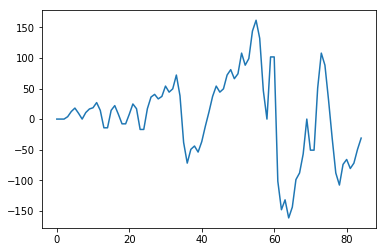

In [27]:
# development

grad_notes = np.gradient(notes)
#print(grad_notes)
#print(len(grad_notes))
#plt.plot(notes)
plt.plot(grad_notes)

In [28]:
# run makeDataChord
import makeDataChord_v2 as mDc
reload(mDc)

ch_notes, ch_times, ch_durs = mDc.makeDataChord(pitches,time,times,notes)
print(len(ch_durs))



47


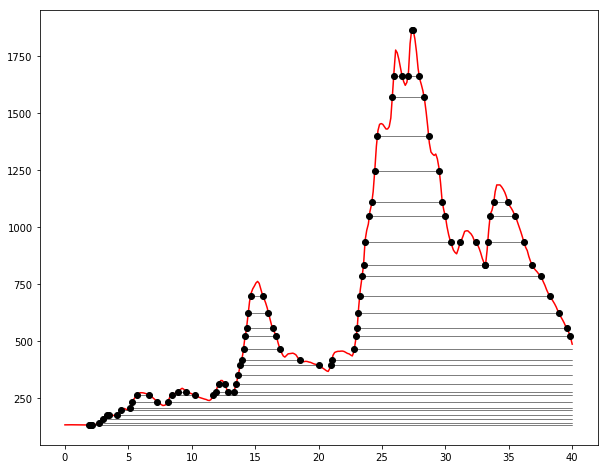

In [29]:
# plot the results: 
fig = plt.figure(figsize=(10,8))

plt.plot(time,p1_freq, 'r-')
plt.plot(times,notes,'ko')


for i in range(len(ch_notes)):
    
    plt.plot([ch_times[i],ch_times[i]+ch_durs[i]],[ch_notes[i],ch_notes[i]],'k-', linewidth=0.5)

In [30]:
reload(wRT_wt)
base_name = 'test_dataChords'
tones_dict = {}
tones_dict['times'] = np.asarray(ch_times)
tones_dict['notes'] = np.asarray(ch_notes)
tones_dict['durs'] = np.asarray(ch_durs)
tones_dict['amps'] = np.ones(len(ch_notes))*2000
tones_dict['pans'] = np.ones(len(ch_notes))*0.5

score_name = wRT_wt.writesco(tones_dict,base_name)

test_dataChords.sco
CMIX not found; rtoutput() will not be used in score.


In [31]:
cmix_cmd = 'CMIX < ' + score_name
print(cmix_cmd)

# the ! tells the notebook to run a command in the terminal (this does not work in a script!)
! pwd
! ls *.sco
# or if that doesnt work, try this: 
ls_output = sp.check_output(['pwd'])

print(ls_output)
# but THIS works better ! 
! pwd

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True
runCMIX.wait()
print("hopefully i just wrote your sound file; is it here?")
! ls *.wav



CMIX < test_dataChords.sco
/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes
phrygian_c.sco      scale2_RT.sco       test_dataChords.sco
b'/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes\n'
/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/1_codes
hopefully i just wrote your sound file; is it here?
ls: *.wav: No such file or directory


In [32]:
sp.run(['mv', score_name, '../3_output_nogit/'])
sp.run('mv *.wav ../3_output_nogit/', shell=True)
sp.run('mv *.sco ../3_output_nogit/', shell=True)

CompletedProcess(args='mv *.sco ../3_output_nogit/', returncode=0)

# Exercises
### Compose with heat and humidity, using the data from your group !: 
### 1) Make a new version of the notebook or use a script (copy and paste the parts you need)
### 2) compose one track for temp and one for humidity, using different but complementary methods (we will soon put these together with movies in stereo. 
### Please note the things in the code that you don't understand ! 